In [1]:
from oracles import LogRegOracle
from optimization import barrier_method_lasso
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Устанавливаем начальное значение для генератора случайных чисел
np.random.seed(42)

In [3]:
# Определяем размеры матрицы и коэффициент регуляризации
m = 600  # Число наблюдений
n = 300  # Число признаков
regcoef = 1e-4  # Коэффициент регуляризации

## Эксперимент *a*

In [4]:
# Генерируем случайные данные для задачи логистической регрессии
A = np.random.randn(m, n)  # Матрица признаков
b = np.random.randn(m)  # Вектор целевой переменной

In [5]:
# Создаём объект логистической регрессии с заданными данными
logreg = LogRegOracle(A, b, regcoef)

In [6]:
# Задаём начальные точки для метода барьеров
x_0 = np.ones(n)  # Начальное значение для решения
u_0 = np.ones(n) * 5  # Начальное значение для вектора барьеров

success
success
success
success
success
success
success


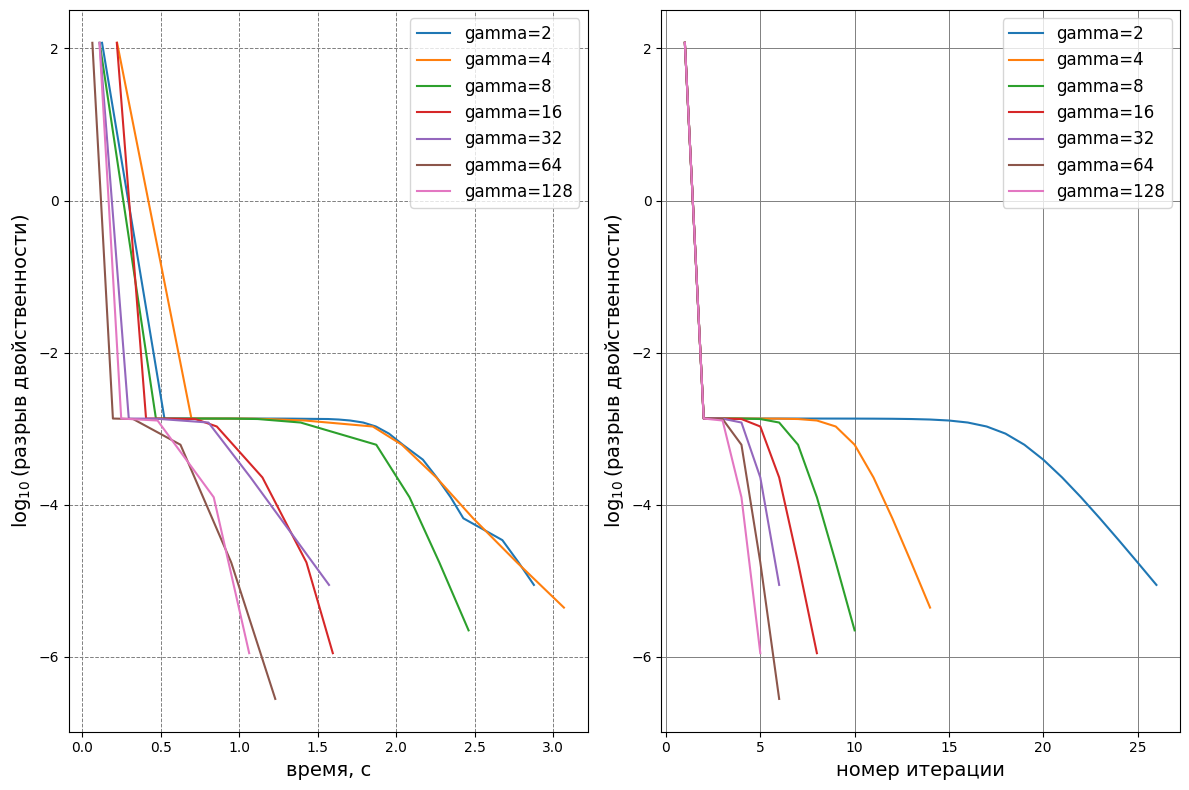

In [7]:
# Настраиваем графики для отображения результатов
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Исследуем влияние параметра gamma
gammas = [2, 4, 8, 16, 32, 64, 128]
for gamma in gammas:
    # Применяем метод барьеров и получаем историю оптимизации
    message, history = barrier_method_lasso(logreg, x_0, u_0, gamma=gamma, trace=True)
    
    # Выводим сообщение о результате
    print(message)
    
    # Строим графики зависимости логарифма двойственного разрыва от времени
    ax[0].plot(history['time'], np.log10(history['duality_gap']), 
                label=f'gamma={gamma}')
    
    # Строим графики зависимости логарифма двойственного разрыва от номера итерации
    ax[1].plot(np.arange(1, len(history['time']) + 1), np.log10(history['duality_gap']), 
                label=f'gamma={gamma}')

# Настраиваем первый график
ax[0].legend(loc='best', fontsize=12)
ax[0].set_xlabel('время, с', fontsize=14)
ax[0].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=14)
ax[0].grid(color='gray', linestyle='--', linewidth=0.7)

# Настраиваем второй график
ax[1].legend(loc='best', fontsize=12)
ax[1].set_xlabel('номер итерации', fontsize=14)
ax[1].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=14)
ax[1].grid(color='gray', linestyle='-', linewidth=0.7)

# Отображаем графики
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()

success
success
success
success
success
success


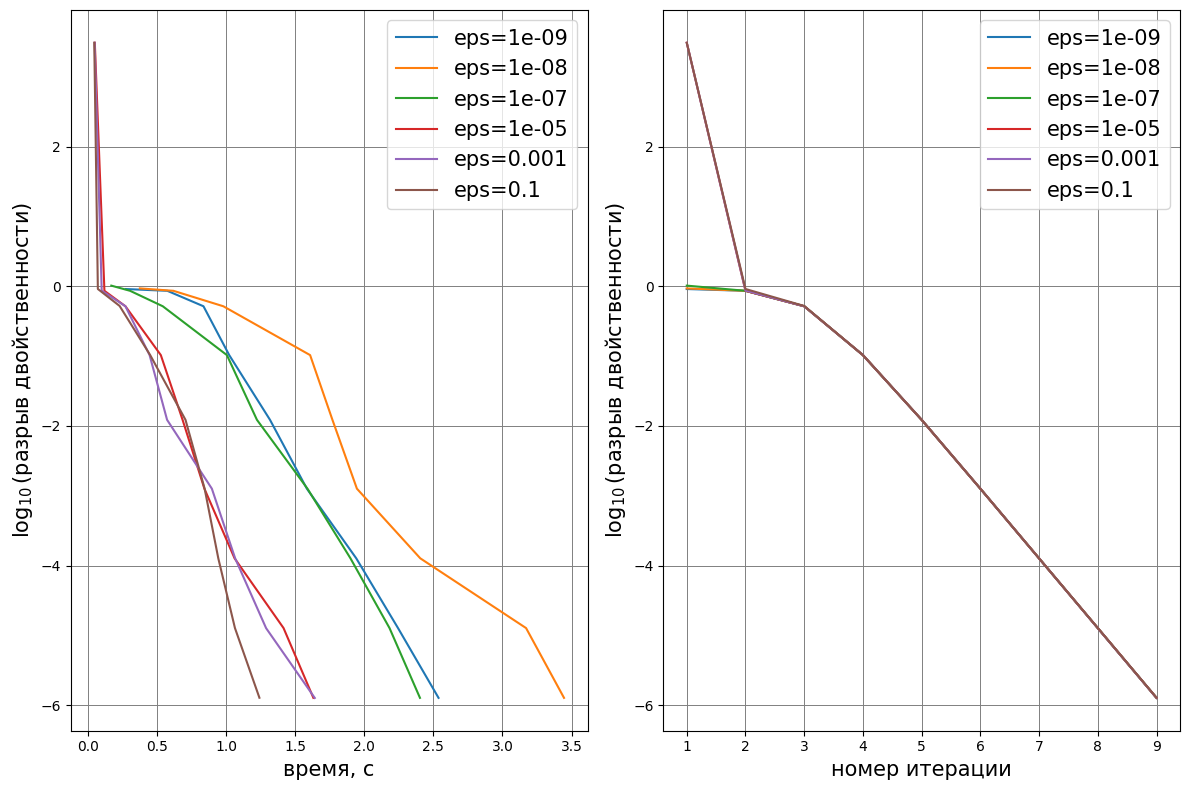

In [12]:
# Создаём новый набор графиков для исследования параметра точности
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Исследуем влияние параметра epsilon
inner_eps = [1e-9, 1e-8, 1e-7, 1e-5, 1e-3, 1e-1]
for eps in inner_eps:
    # Применяем метод барьеров с различными значениями epsilon
    message, history = barrier_method_lasso(logreg, x_0, u_0, tolerance_inner=eps, trace=True)
    
    # Выводим сообщение о результате
    print(message)
    
    # Строим графики зависимости логарифма двойственного разрыва от времени
    ax[0].plot(history['time'], np.log10(history['duality_gap']), 
               label=f'eps={eps}')

    # Строим графики зависимости логарифма двойственного разрыва от номера итерации
    ax[1].plot(np.arange(1, len(history['time']) + 1), 
               np.log10(history['duality_gap']), 
               label=f'eps={eps}')

# Настраиваем первый график
ax[0].legend(loc='best', fontsize=15)
ax[0].set_xlabel('время, с', fontsize=15)
ax[0].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[0].grid(color='gray', linestyle='-', linewidth=0.7)

# Настраиваем второй график
ax[1].legend(loc='best', fontsize=15)
ax[1].set_xlabel('номер итерации', fontsize=15)
ax[1].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[1].grid(color='gray', linestyle='-', linewidth=0.7)

# Настройка внешнего вида графиков
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()  # Отображаем графики

## Эксперимент *b*

success
success
success
success
success
success


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


success


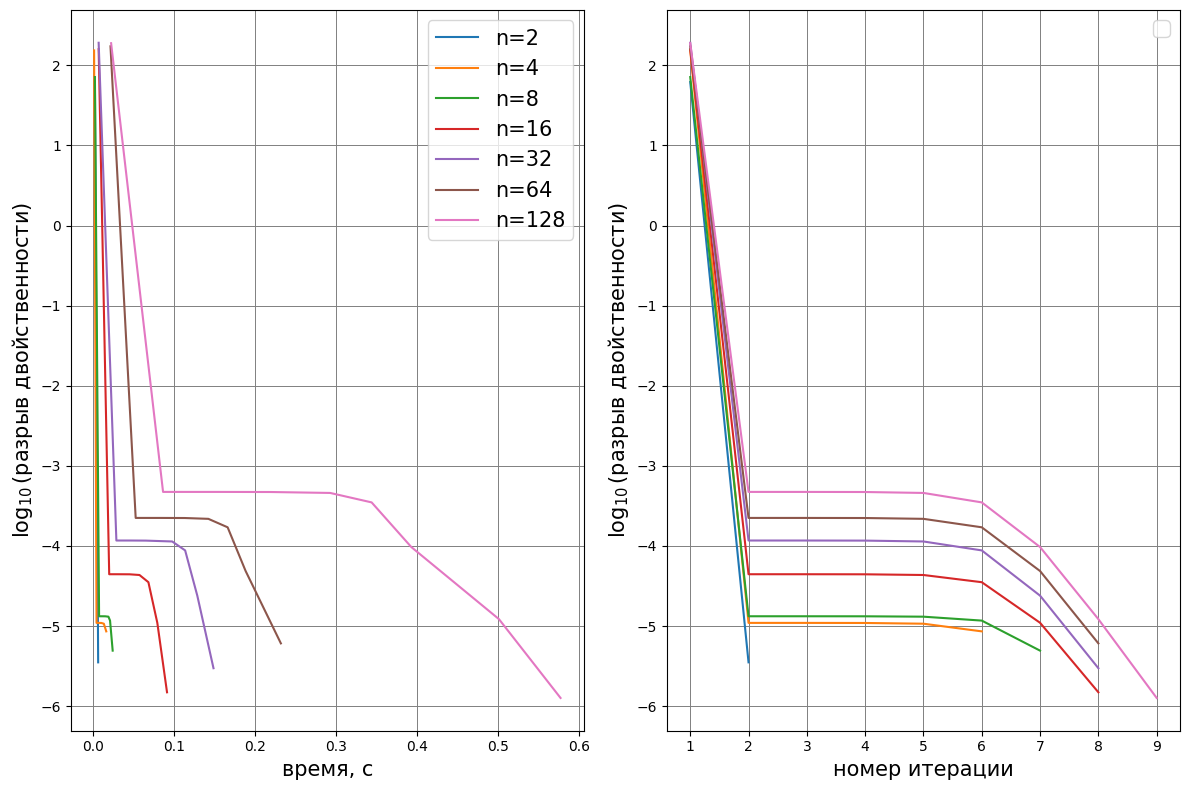

In [9]:
# Создаём графики для анализа зависимости от числа признаков
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Исследуем влияние числа признаков n
ns = [2, 4, 8, 16, 32, 64, 128]
for n in ns:
    # Генерируем случайные данные
    A = np.random.randn(m, n)  # Матрица признаков
    b = np.random.randn(m)  # Вектор целевой переменной
    
    # Создаём объект логистической регрессии
    logreg = LogRegOracle(A, b, regcoef)
    
    # Начальные значения для метода барьеров
    x_0 = np.ones(n)
    u_0 = np.ones(n) * 5
    
    # Применяем метод барьеров и получаем историю оптимизации
    message, history = barrier_method_lasso(logreg, x_0, u_0, trace=True)
    
    # Выводим сообщение о результате
    print(message)
    
    # Строим графики зависимости логарифма двойственного разрыва от времени
    ax[0].plot(history['time'], np.log10(history['duality_gap']), label=f'n={n}')
    
    # Строим графики зависимости логарифма двойственного разрыва от номера итерации
    ax[1].plot(np.arange(1, len(history['time']) + 1), np.log10(history['duality_gap']))

# Настраиваем первый график
ax[0].legend(loc='best', fontsize=15)
ax[0].set_xlabel('время, с', fontsize=15)
ax[0].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[0].grid(color='gray', linestyle='-', linewidth=0.7)

# Настраиваем второй график
ax[1].legend(loc='best', fontsize=15)
ax[1].set_xlabel('номер итерации', fontsize=15)
ax[1].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[1].grid(color='gray', linestyle='-', linewidth=0.7)

# Отображаем графики
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()

success
success
success
success
success


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


success


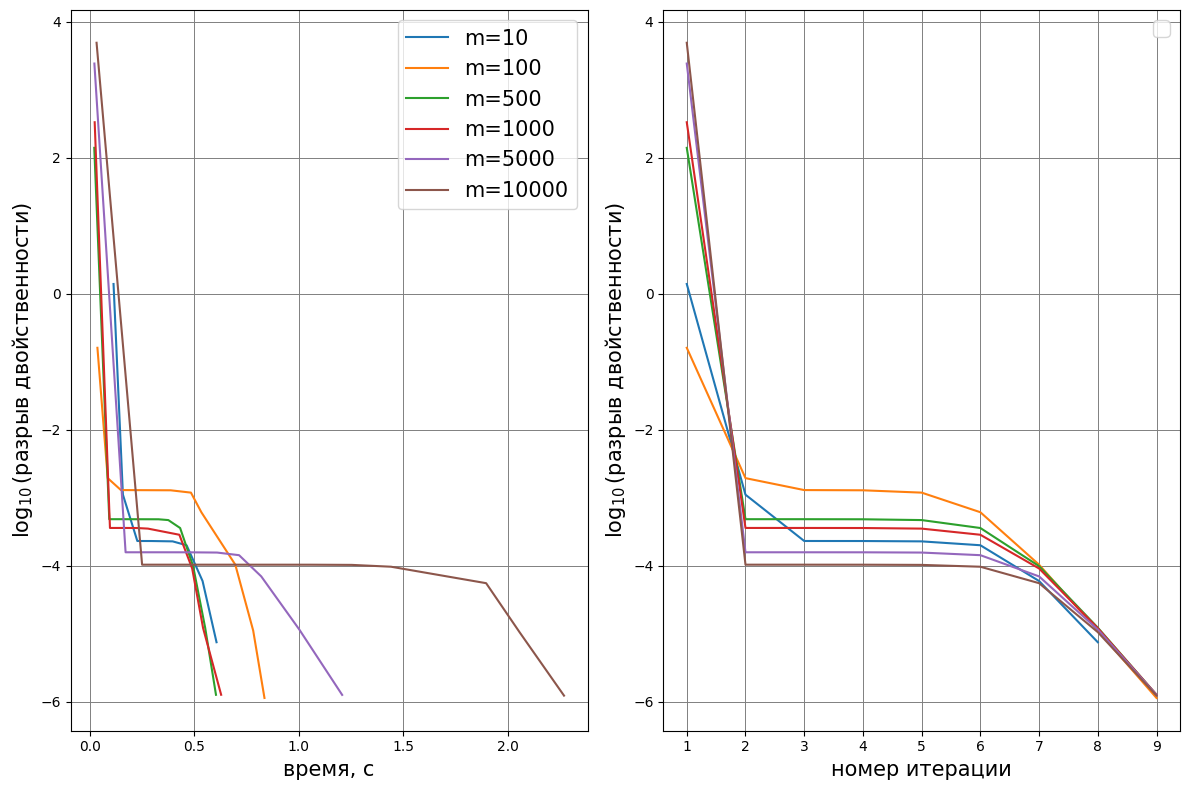

In [10]:
# Создаём графики для анализа зависимости от числа наблюдений
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Исследуем влияние числа наблюдений m
ms = [10, 100, 500, 1000, 5000, 10000]
for m in ms:
    # Генерируем случайные данные
    A = np.random.randn(m, n)  # Матрица признаков
    b = np.random.randn(m)  # Вектор целевой переменной
    
    # Создаём объект логистической регрессии
    logreg = LogRegOracle(A, b, regcoef)
    
    # Начальные значения для метода барьеров
    x_0 = np.ones(n)
    u_0 = np.ones(n) * 5
    
    # Применяем метод барьеров и получаем историю оптимизации
    message, history = barrier_method_lasso(logreg, x_0, u_0, trace=True)
    
    # Выводим сообщение о результате
    print(message)
    
    # Строим графики зависимости логарифма двойственного разрыва от времени
    ax[0].plot(history['time'], np.log10(history['duality_gap']), label=f'm={m}')
    
    # Строим графики зависимости логарифма двойственного разрыва от номера итерации
    ax[1].plot(np.arange(1, len(history['time']) + 1), np.log10(history['duality_gap']))

# Настраиваем первый график
ax[0].legend(loc='best', fontsize=15)
ax[0].set_xlabel('время, с', fontsize=15)
ax[0].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[0].grid(color='gray', linestyle='-', linewidth=0.7)

# Настраиваем второй график
ax[1].legend(loc='best', fontsize=15)
ax[1].set_xlabel('номер итерации', fontsize=15)
ax[1].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[1].grid(color='gray', linestyle='-', linewidth=0.7)

# Отображаем графики
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()

success
success
success
success
success
success
success
success
success
success


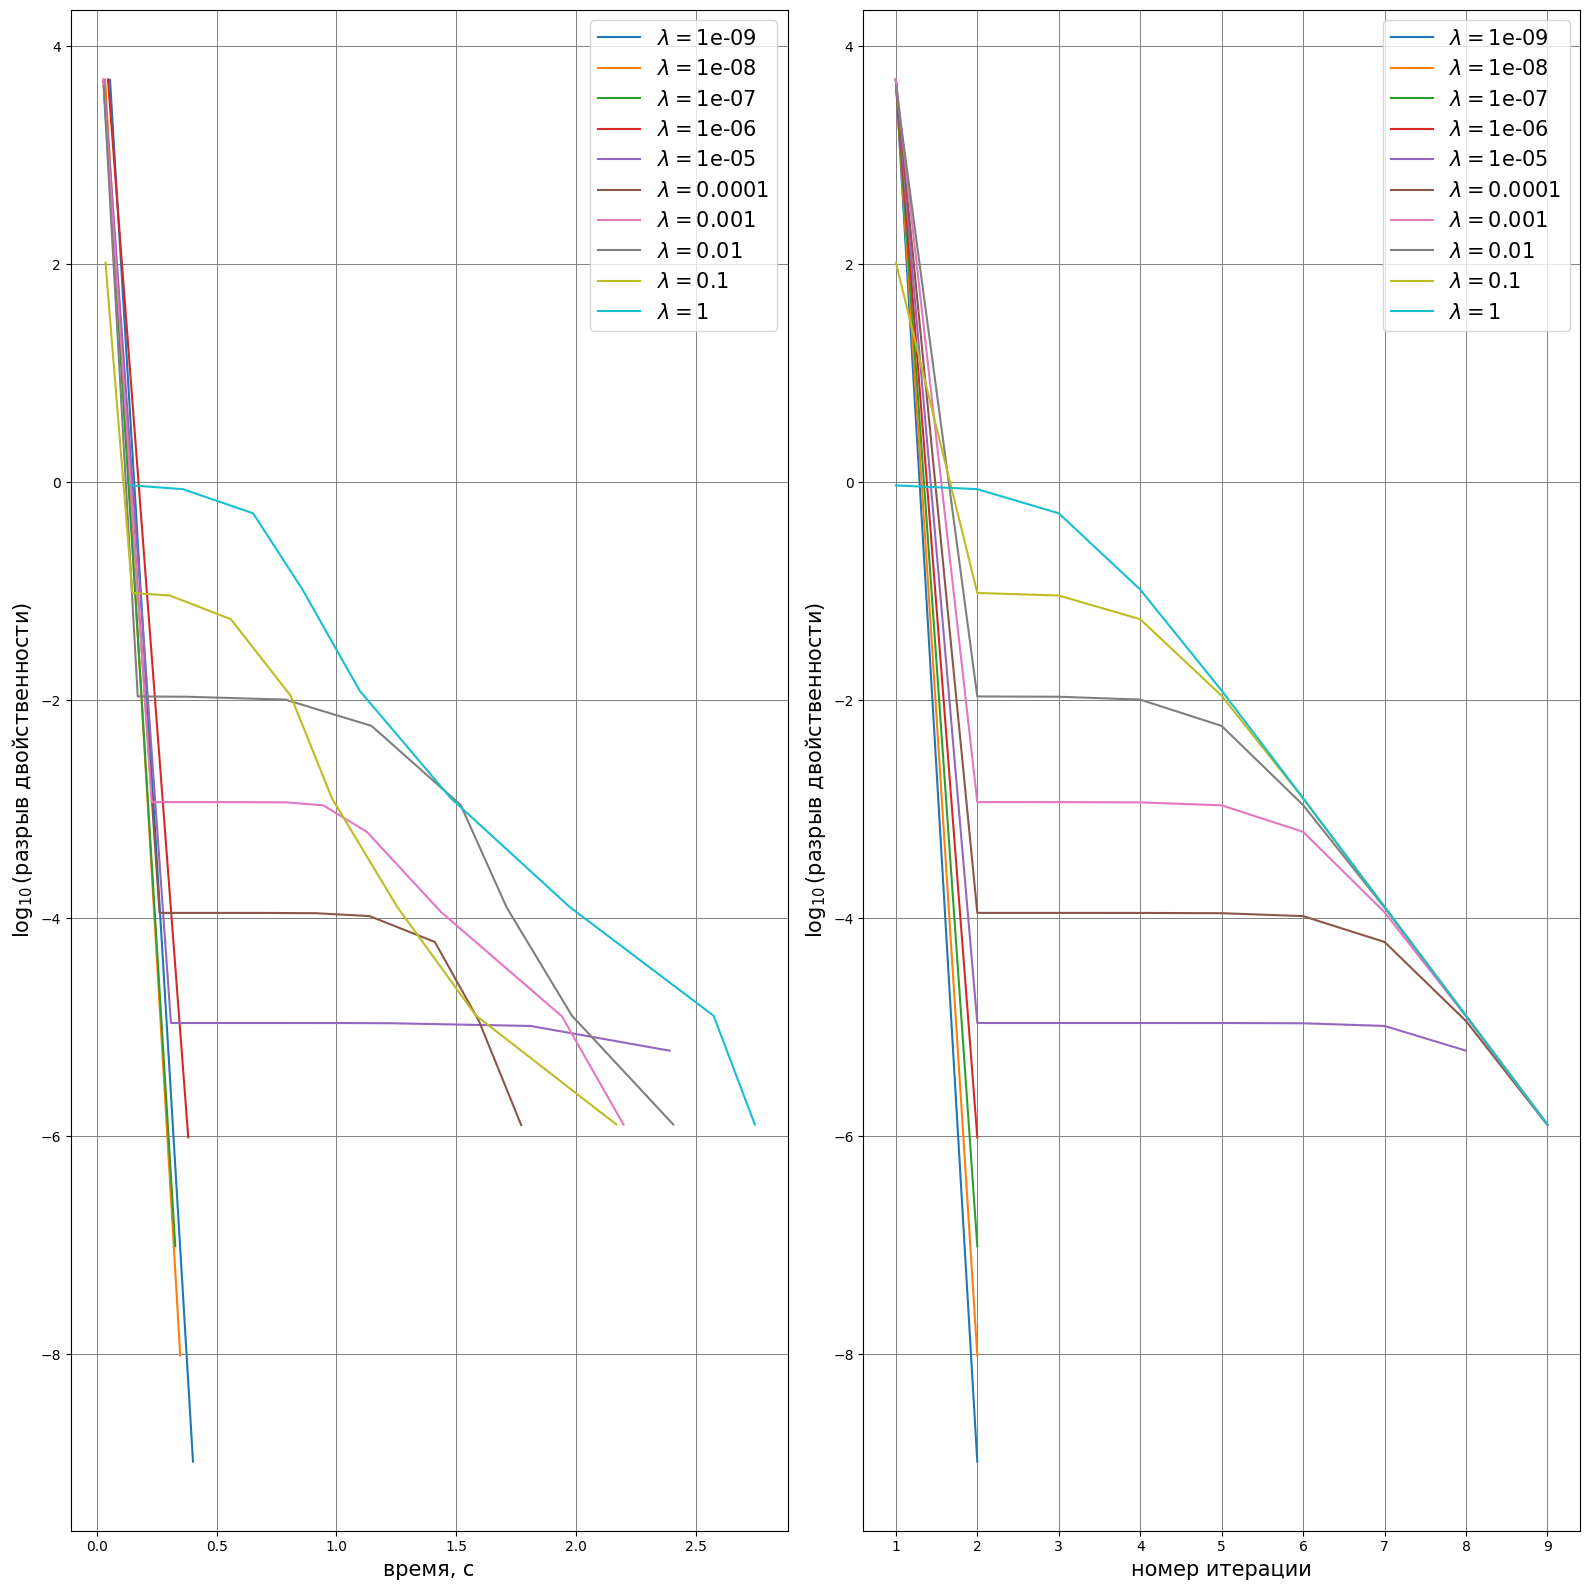

In [11]:
# Создаём графики для анализа зависимости от коэффициента регуляризации
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))

# Исследуем влияние коэффициента регуляризации
regcoefs = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
for coef in regcoefs:
    # Генерируем случайные данные
    A = np.random.randn(m, n)  # Матрица признаков
    b = np.random.randn(m)  # Вектор целевой переменной
    
    # Создаём объект логистической регрессии с разными коэффициентами регуляризации
    logreg = LogRegOracle(A, b, coef)
    
    # Начальные значения для метода барьеров
    x_0 = np.ones(n)
    u_0 = np.ones(n) * 5
    
    # Применяем метод барьеров и получаем историю оптимизации
    message, history = barrier_method_lasso(logreg, x_0, u_0, trace=True)
    
    # Выводим сообщение о результате
    print(message)
    
    # Строим графики зависимости логарифма двойственного разрыва от времени
    ax[0].plot(history['time'], np.log10(history['duality_gap']), label=r'$\lambda=$' + f'{coef}')
    
    # Строим графики зависимости логарифма двойственного разрыва от номера итерации
    ax[1].plot(np.arange(1, len(history['time']) + 1), np.log10(history['duality_gap']), label=r'$\lambda=$' + f'{coef}')

# Настраиваем первый график
ax[0].legend(loc='best', fontsize=15)
ax[0].set_xlabel('время, с', fontsize=15)
ax[0].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[0].grid(color='gray', linestyle='-', linewidth=0.7)

# Настраиваем второй график
ax[1].legend(loc='best', fontsize=15)
ax[1].set_xlabel('номер итерации', fontsize=15)
ax[1].set_ylabel(r'$\log_{10}(\text{разрыв двойственности})$', fontsize=15)
ax[1].grid(color='gray', linestyle='-', linewidth=0.7)

# Отображаем графики
plt.tight_layout()  # Автоматическое размещение элементов
plt.show()
